In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import cv2
# import numpy as np
# import os

# # Specify the paths to your original images and the directory to save augmented images
# original_images_path = '/content/drive/MyDrive/Capstone/allergic vs non_allergic/hypersensitivity_allergic_dermatosis'
# augmented_images_path = '/content/allergic_augmented'

# # Create the directory to save augmented images if it doesn't exist
# os.makedirs(augmented_images_path, exist_ok=True)

# # Specify the augmentation parameters
# rotation_angles = [30, 60, 90, 120, 150]  # Rotation angles
# flipping_codes = [0, 1, -1]  # Flipping codes

# # Iterate through each original image
# for filename in os.listdir(original_images_path):
#     if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extension as needed
#         # Load the original image
#         image_path = os.path.join(original_images_path, filename)
#         image = cv2.imread(image_path)

#         # Generate rotated variations
#         for angle in rotation_angles:
#             # Rotate the image
#             rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1.0)
#             rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

#             # Save the rotated image
#             save_path = os.path.join(augmented_images_path, f'rotated_{angle}_{filename}')
#             cv2.imwrite(save_path, rotated_image)

#         # Generate flipped variations
#         for code in flipping_codes:
#             # Flip the image
#             flipped_image = cv2.flip(image, code)

#             # Save the flipped image
#             flip_code_str = 'h' if code == 0 else 'v' if code == 1 else 'hv'
#             save_path = os.path.join(augmented_images_path, f'flipped_{flip_code_str}_{filename}')
#             cv2.imwrite(save_path, flipped_image)


In [3]:
import cv2
import numpy as np
import os

# Specify the paths to your original images and the directory to save augmented images
original_images_path = '/content/drive/MyDrive/Capstone/allergic vs non_allergic/hypersensitivity_allergic_dermatosis'
augmented_images_path = '/content/allergic_augmented_new'

# Create the directory to save augmented images if it doesn't exist
os.makedirs(augmented_images_path, exist_ok=True)

# Specify the augmentation parameters
rotation_angles = [30, 60, 90, 120, 150]  # Rotation angles
flipping_codes = [0, 1, -1]  # Flipping codes
brightness_factors = [0.6, 1.2]  # Brightness adjustment factors
saturation_factors = [0.6, 1.2]  # Saturation adjustment factors

# Iterate through each original image
for filename in os.listdir(original_images_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extension as needed
        # Load the original image
        image_path = os.path.join(original_images_path, filename)
        image = cv2.imread(image_path)

        # Generate rotated variations
        for angle in rotation_angles:
            # Rotate the image
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1.0)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Save the rotated image
            save_path = os.path.join(augmented_images_path, f'rotated_{angle}_{filename}')
            cv2.imwrite(save_path, rotated_image)

        # Generate flipped variations
        for code in flipping_codes:
            # Flip the image
            flipped_image = cv2.flip(image, code)

            # Save the flipped image
            flip_code_str = 'h' if code == 0 else 'v' if code == 1 else 'hv'
            save_path = os.path.join(augmented_images_path, f'flipped_{flip_code_str}_{filename}')
            cv2.imwrite(save_path, flipped_image)

        # Generate brightness variations
        for factor in brightness_factors:
            # Adjust the image brightness
            brightened_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
            darkened_image = cv2.convertScaleAbs(image, alpha=1.0, beta=-50)

            # Save the brightened and darkened images
            save_path_brightened = os.path.join(augmented_images_path, f'brightened_{int(factor*10)}_{filename}')
            save_path_darkened = os.path.join(augmented_images_path, f'darkened_{int(factor*10)}_{filename}')
            cv2.imwrite(save_path_brightened, brightened_image)
            cv2.imwrite(save_path_darkened, darkened_image)

        # Generate saturation variations
        for factor in saturation_factors:
            # Convert the image to HSV color space
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # Scale the saturation channel
            hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * factor, 0, 255)

            # Convert the image back to BGR color space


In [4]:
# grader-required-cell

source_path = '/content/drive/MyDrive/Capstone/allergic vs non_allergic'

source_path_fungal = os.path.join(source_path, 'hypersensitivity_allergic_dermatosis')
source_path_non_fungal = os.path.join(source_path, 'non_allergic')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_fungal))} images of Fungal Infection.")
print(f"There are {len(os.listdir(source_path_non_fungal))} images of Non Fungal")

There are 13 images of Fungal Infection.
There are 49 images of Non Fungal


In [5]:
# grader-required-cell

# Define root directory
root_dir = '/content/allergic vs non'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """
  ### START CODE HERE
  os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  val_dir = os.path.join(root_path, 'validation')

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  train_cats_dir = os.path.join(train_dir, 'allergic')
  train_dogs_dir = os.path.join(train_dir, 'nonallergic')
  val_cats_dir = os.path.join(val_dir, 'allergic')
  val_dogs_dir = os.path.join(val_dir, 'nonallergic')

  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(val_cats_dir)
  os.makedirs(val_dogs_dir)

  pass
  

  ### END CODE HERE

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/allergic vs non/training
/content/allergic vs non/validation
/content/allergic vs non/training/allergic
/content/allergic vs non/training/nonallergic
/content/allergic vs non/validation/allergic
/content/allergic vs non/validation/nonallergic


In [ ]:
# # function to crop image
# # note: the amount of croped pixels were approxed by me (nopal) 
# #       by measure the excess pixels
# def crop_image(image):
#     crop_width = 1920 - 170 - 160  # Calculate the resulting width after trimming
#     crop_height = 1080  # Height remains the same
#     crop_location = (170, 0)  # Starting position of the crop
#     cropped_image = tf.image.crop(image, crop_location, [crop_height, crop_width])
#     return cropped_image

In [ ]:
# def crop_image(image):
#     crop_width = 1920 - 170 - 150  # Calculate the resulting width after trimming
#     crop_height = 1080  # Height remains the same
#     crop_location = (170, 0)  # Starting position of the crop

#     # Crop the image using array indexing
#     cropped_image = image[crop_location[1]:crop_location[1] + crop_height,
#                           crop_location[0]:crop_location[0] + crop_width, :]

#     return cropped_image

In [ ]:
# # function to split dataset into training and validation
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     files = os.listdir(SOURCE_DIR)

#     verified_files = []
#     for file in files:
#         if os.path.getsize(os.path.join(SOURCE_DIR, file)) == 0:
#             print(f"{file} is zero length, so ignoring.")
#         else:
#             verified_files.append(file)

#     # Shuffle the files
#     random.shuffle(verified_files)

#     # Calculate the split index
#     split_idx = int(SPLIT_SIZE * len(verified_files))

#     # Split the files
#     train_files = verified_files[:split_idx]
#     val_files = verified_files[split_idx:]

#     # Copy train files
#     for file in train_files:
#         src_path = os.path.join(SOURCE_DIR, file)
#         dst_path = os.path.join(TRAINING_DIR, file)
#         # Load the image using TensorFlow
#         image = tf.io.read_file(src_path)
#         image = tf.image.decode_image(image)
#         # Crop the image
#         cropped_image = crop_image(image)
#         # Save the cropped image to the destination directory
#         tf.io.write_file(dst_path, tf.image.encode_png(cropped_image))

#     # Copy validation files
#     for file in val_files:
#         src_path = os.path.join(SOURCE_DIR, file)
#         dst_path = os.path.join(VALIDATION_DIR, file)
#         # Load the image using TensorFlow
#         image = tf.io.read_file(src_path)
#         image = tf.image.decode_image(image)
#         # Crop the image
#         cropped_image = crop_image(image)
#         # Save the cropped image to the destination directory
#         tf.io.write_file(dst_path, tf.image.encode_png(cropped_image))

In [ ]:
# # grader-required-cell

# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#   """
#   Splits the data into train and test sets
  
#   Args:
#     SOURCE_DIR (string): directory path containing the images
#     TRAINING_DIR (string): directory path to be used for training
#     VALIDATION_DIR (string): directory path to be used for validation
#     SPLIT_SIZE (float): proportion of the dataset to be used for training
    
#   Returns:
#     None
#   """

#   ### START CODE HERE
#   file_list = []


#   for file in os.listdir(SOURCE_DIR):
#     file_path = os.path.join(SOURCE_DIR,file)
#     if(os.path.getsize(file_path) == 0):
#       print(file + " is zero length, so ignoring.")
#     else:
#       file_list.append(file_path)

#   train_num_items = int(round(len(file_list) * SPLIT_SIZE, 0))
#   train_list = random.sample(file_list, train_num_items)
#   val_list = list(set(file_list) - set(train_list))

#   for f in train_list:
#     copyfile(f,TRAINING_DIR+os.path.basename(f))
#   for f in val_list:
#     copyfile(f,VALIDATION_DIR+os.path.basename(f))

#   pass

#   ### END CODE HERE

In [7]:
import random

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  file_list = []

  for file in os.listdir(SOURCE_DIR):
    file_path = os.path.join(SOURCE_DIR, file)
    if os.path.getsize(file_path) == 0:
      print(file + " is zero length, so ignoring.")
    else:
      file_list.append(file_path)

  random.shuffle(file_list)  # Shuffle the file list randomly

  train_num_items = int(round(len(file_list) * SPLIT_SIZE, 0))
  train_list = file_list[:train_num_items]
  val_list = file_list[train_num_items:]

  for f in train_list:
    copyfile(f, TRAINING_DIR + os.path.basename(f))
  for f in val_list:
    copyfile(f, VALIDATION_DIR + os.path.basename(f))

  pass

In [8]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/content/allergic_augmented_new"
DOG_SOURCE_DIR = "/content/drive/MyDrive/Capstone/allergic vs non_allergic/non_allergic"

TRAINING_DIR = "/content/allergic vs non/training"
VALIDATION_DIR = "/content/allergic vs non/validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "allergic/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "allergic/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "nonallergic/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "nonallergic/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal allergic directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original nonallergic directory has {len(DOG_SOURCE_DIR)} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of allergic for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of nonallergic for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of allergic for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of nonallergic for validation")



Original allergic directory has 156 images
Original nonallergic directory has 69 images

There are 125 images of allergic for training
There are 39 images of nonallergic for training
There are 31 images of allergic for validation
There are 10 images of nonallergic for validation


In [9]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(    
    rescale=1.0/255.)
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True,
    # fill_mode='nearest')
    # rescale=1.0/255,
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True,)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(128, 128))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(
    rescale=1.0/255.)
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True,
    # fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(128, 128))
  ### END CODE HERE
  return train_generator, validation_generator

In [10]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 164 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [11]:
# grader-required-cell

# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.86:
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [12]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [13]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [14]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
model = create_model()
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/50
11/11 [==============================] - 21s 859ms/step - loss: 0.7321 - accuracy: 0.7134 - val_loss: 0.6070 - val_accuracy: 0.7561
Epoch 2/50
11/11 [==============================] - 8s 703ms/step - loss: 0.5465 - accuracy: 0.7622 - val_loss: 0.4901 - val_accuracy: 0.7561
Epoch 3/50
11/11 [==============================] - 9s 865ms/step - loss: 0.4236 - accuracy: 0.7622 - val_loss: 0.3891 - val_accuracy: 0.7561
Epoch 4/50
11/11 [==============================] - 8s 710ms/step - loss: 0.3556 - accuracy: 0.8354 - val_loss: 0.4186 - val_accuracy: 0.7561
Epoch 5/50
11/11 [==============================] - 7s 672ms/step - loss: 0.3679 - accuracy: 0.8171 - val_loss: 0.3729 - val_accuracy: 0.7805
Epoch 6/50
11/11 [==============================] - 9s 814ms/step - loss: 0.3706 - accuracy: 0.8415 - val_loss: 0.4128 - val_accuracy: 0.7805
Epoch 7/50
11/11 [==============================] - 9s 803ms/step - loss: 0.3941 - accuracy: 0.7866 - val_loss: 0.4330 - val_accuracy: 0.7317
Epoch

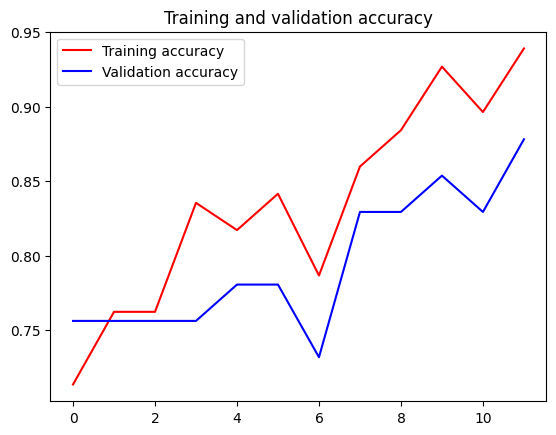

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image  # Import from tf.keras instead of keras

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))  # Use tf.keras.preprocessing.image.load_img
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving dog210422_04_02_33_pic0.jpg to dog210422_04_02_33_pic0.jpg
Saving dog210505_01_02_27_pic0.jpg to dog210505_01_02_27_pic0.jpg
Saving dog210508_06_02_20_pic0.jpg to dog210508_06_02_20_pic0.jpg
Saving dog210612_48_02_12_pic0_aler.jpg to dog210612_48_02_12_pic0_aler.jpg
Saving Dog210621_13_02_42_pic0.jpg to Dog210621_13_02_42_pic0.jpg
Saving Dog210622_01_01_39_pic0_aler.jpg to Dog210622_01_01_39_pic0_aler.jpg
Saving Dog210624_12_02_32_pic0_aler.jpg to Dog210624_12_02_32_pic0_aler.jpg
1/1 [==============================] - 0s 235ms/step
dog210422_04_02_33_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 18ms/step
dog210505_01_02_27_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 19ms/step
dog210508_06_02_20_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 21ms/step
dog210612_48_02_12_pic0_aler.jpg
[[0.]]
1/1 [==============================] - 0s 20ms/step
Dog210621_13_02_42_pic0.jpg
[[0.]]
1/1 [==============================] - 0s 19ms/step
Dog210622_01_01

In [17]:
class_labels = ['allergic', 'non-allergic']

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_label = class_labels[int(classes[0][0])]
    
    print(fn)
    print(predicted_label)


1/1 [==============================] - 0s 18ms/step
dog210422_04_02_33_pic0.jpg
non-allergic
1/1 [==============================] - 0s 19ms/step
dog210505_01_02_27_pic0.jpg
non-allergic
1/1 [==============================] - 0s 20ms/step
dog210508_06_02_20_pic0.jpg
non-allergic
1/1 [==============================] - 0s 21ms/step
dog210612_48_02_12_pic0_aler.jpg
allergic
1/1 [==============================] - 0s 22ms/step
Dog210621_13_02_42_pic0.jpg
allergic
1/1 [==============================] - 0s 21ms/step
Dog210622_01_01_39_pic0_aler.jpg
allergic
1/1 [==============================] - 0s 20ms/step
Dog210624_12_02_32_pic0_aler.jpg
allergic


In [18]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"
model.save(saved_model_path)

# YOUR CODE HERE

In [19]:
!pip install tensorflow==2.2
!pip install tensorflowjs
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing 

• Using TensorFlow Version: 2.12.0


In [20]:
# EXERCISE: Use the tensorflow.js converter to convert the saved Keras model into JSON format.
# YOUR CODE HERE
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-06-12 04:59:21.202285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# import zipfile

# # Specify the filenames
# h5_file = "./my_model.h5"
# json_file = "./model.json"

# # Create a zip file
# zip_file_name = "Fungal vs Non Fungal.zip"
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     # Add the h5 file to the zip
#     zipf.write(h5_file, arcname='my_model.h5')

#     # Add the json file to the zip
#     zipf.write(json_file, arcname='model.json')

# print("Output files zipped successfully!")


Output files zipped successfully!


In [22]:
import zipfile

# Specify the filenames
h5_file = "./my_model.h5"
json_file = "./model.json"
bin_file1 = "./group1-shard1of3.bin"
bin_file2 = "./group1-shard2of3.bin"
bin_file3 = "./group1-shard3of3.bin"

# Create a zip file
zip_file_name = "allergic vs non allergic.zip"
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    # Add the h5 file to the zip
    zipf.write(h5_file, arcname='my_model.h5')

    # Add the json file to the zip
    zipf.write(json_file, arcname='model.json')
    
    # Add the bin files to the zip
    zipf.write(bin_file1, arcname='group1-shard1of3.bin')
    zipf.write(bin_file2, arcname='group1-shard2of3.bin')
    zipf.write(bin_file3, arcname='group1-shard3of3.bin')

print("Output files zipped successfully!")

Output files zipped successfully!


In [ ]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [ ]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 11s 885ms/step - loss: 0.6463 - accuracy: 0.5984 - val_loss: 0.5623 - val_accuracy: 0.6774
Epoch 2/15
8/8 [==============================] - 15s 2s/step - loss: 0.5799 - accuracy: 0.6885 - val_loss: 0.4804 - val_accuracy: 0.7097
Epoch 3/15
8/8 [==============================] - 7s 921ms/step - loss: 0.4641 - accuracy: 0.7049 - val_loss: 0.3485 - val_accuracy: 0.8387
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.3779 - accuracy: 0.8197 - val_loss: 0.3667 - val_accuracy: 0.8065
Epoch 5/15
8/8 [==============================] - 7s 864ms/step - loss: 0.3050 - accuracy: 0.8525 - val_loss: 0.1275 - val_accuracy: 0.9677
Epoch 6/15
8/8 [==============================] - 7s 942ms/step - loss: 0.2620 - accuracy: 0.8934 - val_loss: 0.1106 - val_accuracy: 0.9677
Epoch 7/15
8/8 [==============================] - 7s 837ms/step - loss: 0.5323 - accuracy: 0.7705 - val_loss: 0.2240 - val_accuracy: 0.9677
Epoch 8/15
8/8 [========

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
     

Saving dog210508_07_02_21_pic0.jpg to dog210508_07_02_21_pic0.jpg


AttributeError: ignored

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image  # Import from tf.keras instead of keras

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128, 3))  # Use tf.keras.preprocessing.image.load_img
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving dog210424_05_01_31_pic0.jpg to dog210424_05_01_31_pic0.jpg
Saving dog210612_48_02_12_pic0.jpg to dog210612_48_02_12_pic0.jpg
Saving dog210617_01_02_05_pic0.jpg to dog210617_01_02_05_pic0.jpg
Saving dog210617_02_02_01_pic0.jpg to dog210617_02_02_01_pic0.jpg
Saving Dog210621_01_01_43_pic0.jpg to Dog210621_01_01_43_pic0.jpg
Saving Dog210622_01_01_39_pic0.jpg to Dog210622_01_01_39_pic0.jpg
Saving Dog210627_08_02_24_pic0.jpg to Dog210627_08_02_24_pic0.jpg
Saving Dog210704_08_02_01_pic0.jpg to Dog210704_08_02_01_pic0.jpg
1/1 [==============================] - 0s 20ms/step
dog210424_05_01_31_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 19ms/step
dog210612_48_02_12_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 22ms/step
dog210617_01_02_05_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 22ms/step
dog210617_02_02_01_pic0.jpg
[[1.]]
1/1 [==============================] - 0s 22ms/step
Dog210621_01_01_43_pic0.jpg
[[1.]]
1/1 [==============================] 

In [ ]:
class_labels = ['allergic', 'non-allergic']

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_label = class_labels[int(classes[0][0])]
    
    print(fn)
    print(predicted_label)


1/1 [==============================] - 0s 21ms/step
dog210424_05_01_31_pic0.jpg
non-allergic
1/1 [==============================] - 0s 19ms/step
dog210612_48_02_12_pic0.jpg
non-allergic
1/1 [==============================] - 0s 24ms/step
dog210617_01_02_05_pic0.jpg
non-allergic
1/1 [==============================] - 0s 21ms/step
dog210617_02_02_01_pic0.jpg
non-allergic
1/1 [==============================] - 0s 18ms/step
Dog210621_01_01_43_pic0.jpg
non-allergic
1/1 [==============================] - 0s 26ms/step
Dog210622_01_01_39_pic0.jpg
non-allergic
1/1 [==============================] - 0s 20ms/step
Dog210627_08_02_24_pic0.jpg
non-allergic
1/1 [==============================] - 0s 27ms/step
Dog210704_08_02_01_pic0.jpg
non-allergic


In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [ ]:
from tensorflow.keras import models, layers

# Create a new model by adding your own classifier on top of the pre-trained ResNet model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 70s 7s/step - loss: 2.0308 - accuracy: 0.6937 - val_loss: 2025.8903 - val_accuracy: 0.6429
Epoch 2/10
7/7 [==============================] - 44s 6s/step - loss: 0.2158 - accuracy: 0.9189 - val_loss: 143049.0156 - val_accuracy: 0.6429
Epoch 3/10
7/7 [==============================] - 43s 6s/step - loss: 0.2387 - accuracy: 0.9459 - val_loss: 532021.9375 - val_accuracy: 0.6429
Epoch 4/10
7/7 [==============================] - 47s 7s/step - loss: 0.1038 - accuracy: 0.9640 - val_loss: 515740.7812 - val_accuracy: 0.6429
Epoch 5/10
7/7 [==============================] - 44s 6s/step - loss: 0.1261 - accuracy: 0.9910 - val_loss: 254101.0938 - val_accuracy: 0.6429
Epoch 6/10
7/7 [==============================] - 46s 6s/step - loss: 0.2518 - accuracy: 0.9459 - val_loss: 105589.9453 - val_accuracy: 0.6429
Epoch 7/10
7/7 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9910

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(128, 128, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
6/6 [==============================] - 16s 2s/step - loss: 0.5639 - accuracy: 0.7622 - val_loss: 0.5571 - val_accuracy: 0.7561
Epoch 2/15
6/6 [==============================] - 9s 1s/step - loss: 0.5496 - accuracy: 0.7622 - val_loss: 0.5528 - val_accuracy: 0.7561
Epoch 3/15
6/6 [==============================] - 8s 1s/step - loss: 0.5453 - accuracy: 0.7622 - val_loss: 0.5533 - val_accuracy: 0.7561
Epoch 4/15
6/6 [==============================] - 9s 2s/step - loss: 0.5445 - accuracy: 0.7622 - val_loss: 0.5525 - val_accuracy: 0.7561
Epoch 5/15
6/6 [==============================] - 9s 2s/step - loss: 0.5416 - accuracy: 0.7622 - val_loss: 0.5491 - val_accuracy: 0.7561
Epoch 6/15
6/6 [==============================] - 9s 2s/step - loss: 0.5379 - accuracy: 0.7622 - val_loss: 0.5469 - val_accuracy: 0.7561
Epoch 7/15
6/6 [==============================] - 10s 2s/step - loss: 0.5353 - accuracy: 0.7622 - val_loss: 0.5446 - val_accuracy: 0.7561
Epoch 8/15
6/6 [=======================